# Supervised Learning: Regression Module

## Course Project

## Introduction

In this report, we present to the Head of Analytics of our company Climate Corp the results of our analysis of the climatological data of the ENSO phenomenon, better known as "El Niño", through the linear regression techniques selected to obtain a better estimation of the behaviour metrics of the data, in this case, the temperature of the seawater in the area of interest.
This document consists of the following sections:

* 01. Main objective of our data analysis
* 02. Brief description of the chosen data set
* 03. Data exploration, cleaning and feature engineering scheme
* 04. Linear regression models application
* 05. Linear regression model selection to apply to the data set
* 06. Summary Key Findings and Insights
* 07. Suggestions for next steps

In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
%matplotlib inline

from helper import (plot_exponential_data, 
                    plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


## 01. Main objective of our data analysis

El Niño–Southern Oscillation (ENSO) is the dominant mode of interannual variability in the tropical Pacific. However, the models in the ensemble from phase 6 of the Coupled Model Intercomparison Project (CMIP5) have considerable deficiencies in ENSO amplitude, spatial structure, and temporal variability. The use of linear regression as an essential technique to address these pervasive errors is considered, as a first step.

## 02. Brief description of the data set and a summary of its attributes

I will be using the NOAA data set for this Course Project. This is a well-known data set containing climate and earth sciences datasets, NOAA-NCEI is one of the world’s largest provider of weather and climate data. Land-based, marine, model, radar, weather balloon, satellite, and paleoclimatic are just a few of the types of datasets available.

The data we will use is in a file called data.csv found in the data directory. "El Niño" (ENOS) and "La Niña" is a phenomenon in the equatorial Pacific Ocean characterized by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above (below) the threshold of +0.5°C (-0.5°C). This standard of measure is known as the Oceanic Niño Index (ONI).

This data comes from https://psl.noaa.gov/gcos_wgsp/Timeseries/Data/nino34.long.anom.data

There are 1800 data of monthly temperature fluctuations from 1870 to 2019, the data series contains 150 rows corresponding to the years and 12 columns corresponding to the months of the year. 

Load the data from the file using the techniques we learned from this course. Some general info regarding the dataset is showing next:

#### 02.1. Head of the dataset

In [2]:
filepath = "data/data.csv"
data = pd.read_csv(filepath)
(data.head())

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1870,1.000,1.440,0.689,0.656,1.613,1.166,1.082,0.774,0.281,0.846,0.624,0.624
1,1871,0.063,0.336,0.185,0.250,0.490,0.281,0.360,0.109,0.058,0.109,0.096,0.336
2,1872,0.518,0.384,0.250,0.593,0.384,0.270,0.102,0.723,1.040,0.884,0.624,0.774
3,1873,0.608,1.020,1.716,0.449,0.281,0.230,0.336,0.152,0.116,0.608,0.593,0.490
4,1874,0.865,1.124,1.960,0.884,0.740,0.518,1.000,1.103,1.277,1.563,1.769,1.300


#### Number of rows and type of data

In [3]:
print(data.shape[0])
print(len(data))
print(data.dtypes)

150
150
Year           int64
January      float64
February     float64
March        float64
April        float64
May          float64
June         float64
July         float64
August       float64
September    float64
October      float64
November     float64
December     float64
dtype: object


## 03. Data exploration, cleaning and feature engineering scheme

### 03.1. Initial plan for data exploration

As an initial statistical approach, we would determine the following:
* The mean, median, and quantiles and ranges (max-min) for each monthly measurement.

In [4]:
stats_df = data.describe()
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,Year,January,February,March,April,May,June,July,August,September,October,November,December
mean,1944.50,0.936987,0.70772,0.518067,0.35006,0.354113,0.32310,0.387827,0.465927,0.54732,0.734567,0.947747,0.98052
25%,1907.25,0.156000,0.06800,0.058000,0.05425,0.033000,0.02975,0.040000,0.037000,0.05800,0.085500,0.091500,0.12475
median,1944.50,0.416500,0.33050,0.265000,0.17200,0.180500,0.15600,0.185000,0.164000,0.26500,0.449000,0.563000,0.54050
75%,1981.75,1.045750,0.94575,0.723000,0.50750,0.500500,0.44900,0.476000,0.656000,0.68475,0.865000,1.294250,1.31725
range,149.00,6.553000,5.90500,2.856000,1.98800,1.988000,2.13200,2.560000,3.764000,4.41000,5.244000,6.605000,6.55400


### 03.2. Actions taken for data cleaning

I will make a scatter plot of our dataset using Matplotlib. This will be an initial step for the cleaning of the data since we will notice the outliers graphically.

#### 03.2.1. Scatterplot

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

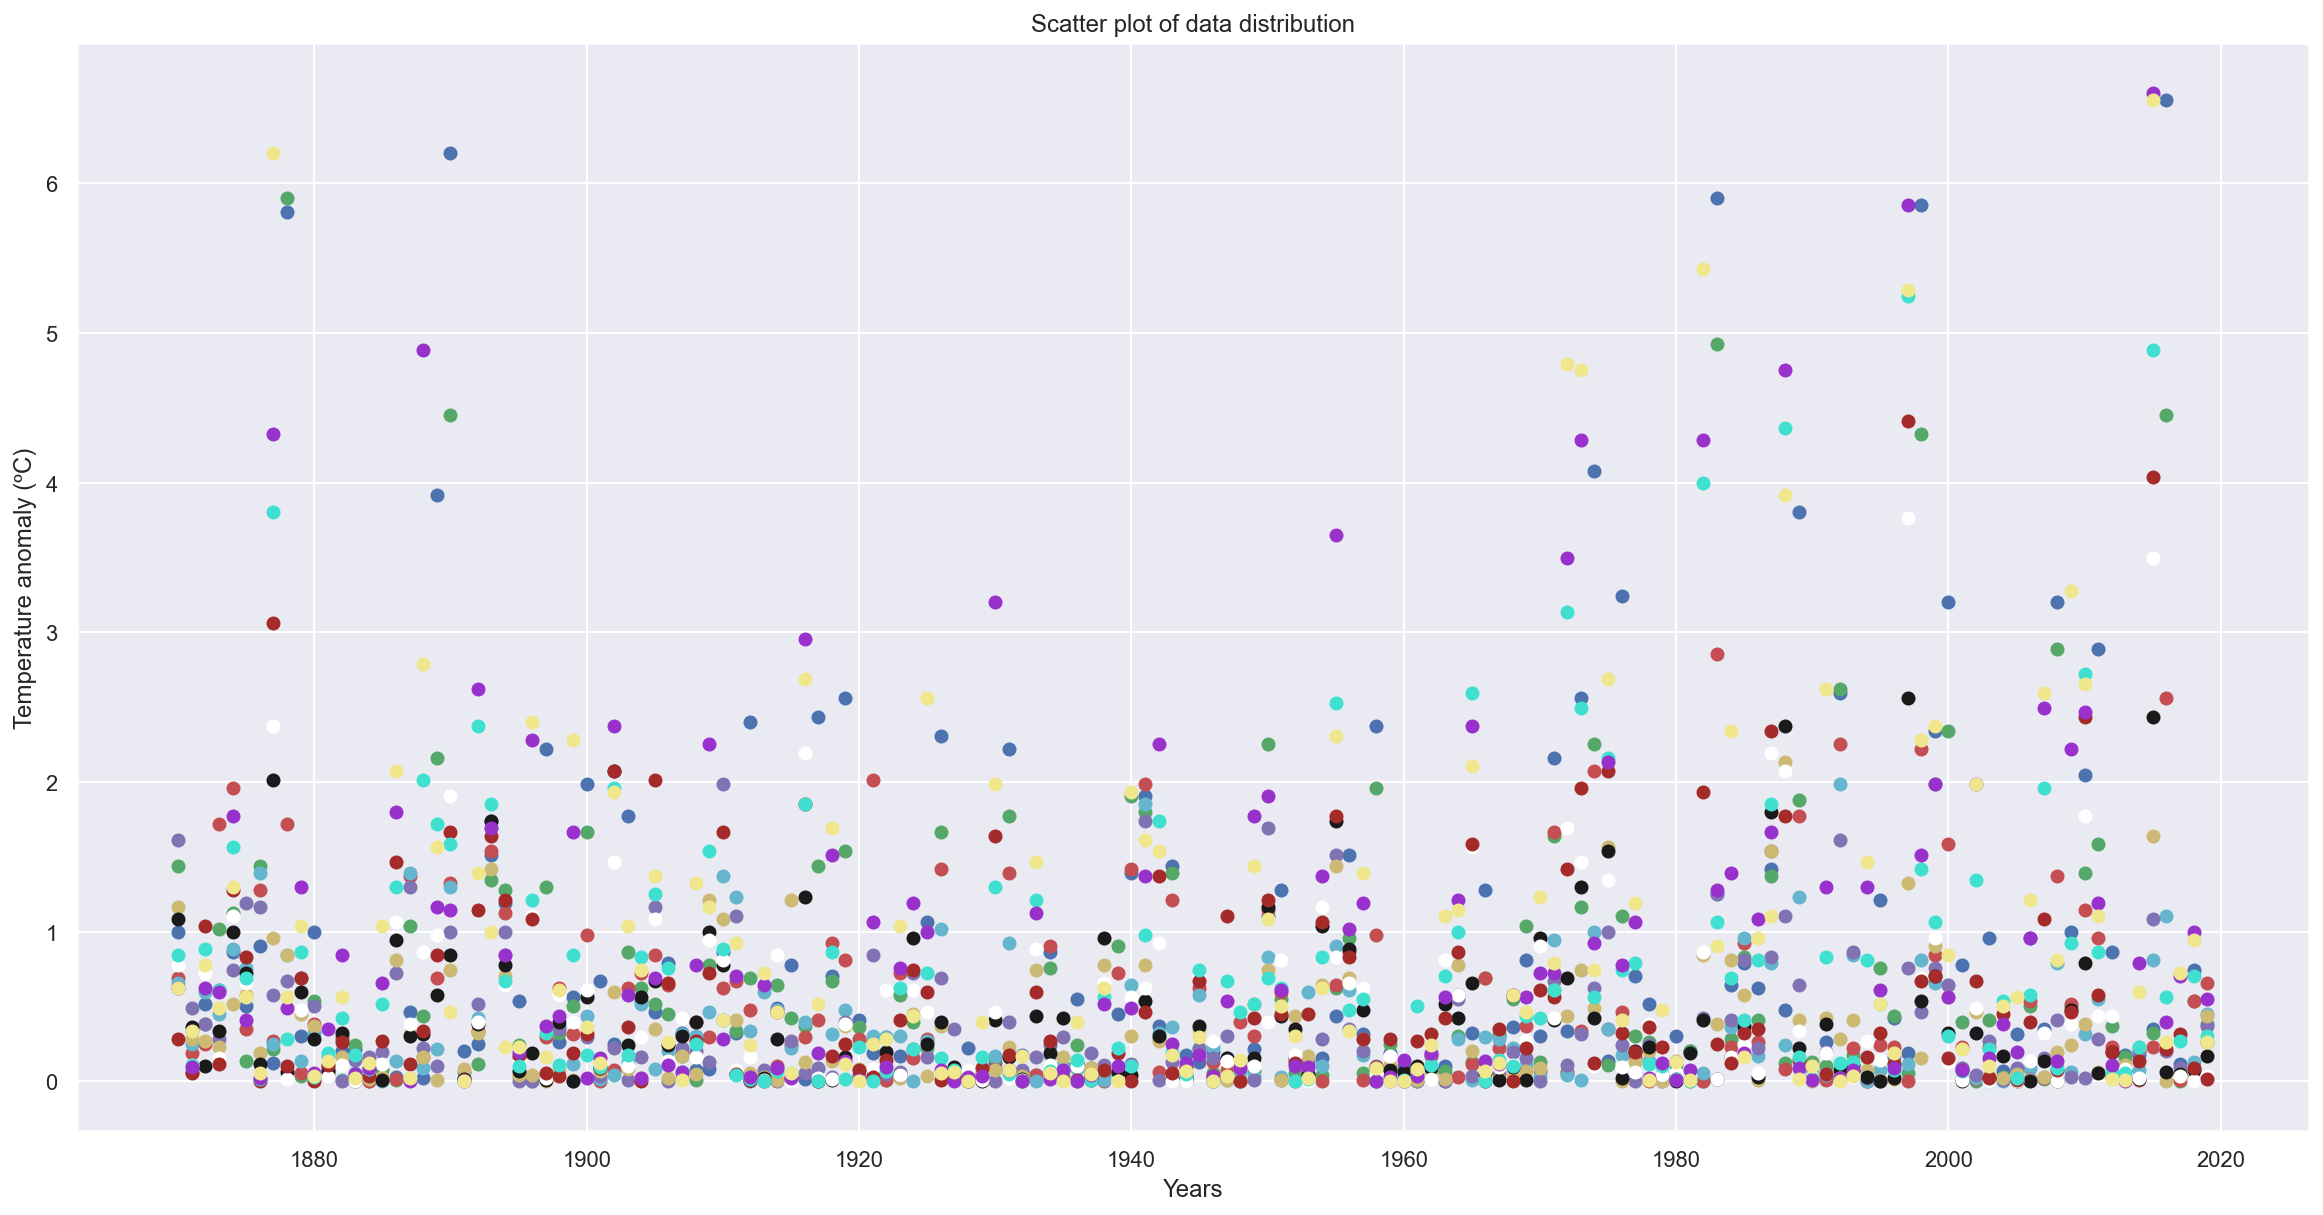

In [6]:
# A simple scatter plot with Matplotlib
# Size of the figure (in inches)
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes()
ax.scatter(data.Year, data.January, color='b')
ax.scatter(data.Year, data.February, color='g')
ax.scatter(data.Year, data.March, color='r')
ax.scatter(data.Year, data.April, color='c')
ax.scatter(data.Year, data.May, color='m')
ax.scatter(data.Year, data.June, color='y')
ax.scatter(data.Year, data.July, color='k')
ax.scatter(data.Year, data.August, color='w')
ax.scatter(data.Year, data.September, color='brown')
ax.scatter(data.Year, data.October, color='turquoise')
ax.scatter(data.Year, data.November, color='darkorchid')
ax.scatter(data.Year, data.December, color='khaki')

# Label the axes
ax.set(xlabel='Years',
       ylabel='Temperature anomaly (ºC)',
       title='Scatter plot of data distribution');

It is possible to see in the previous figure how there are outliers data that do not correspond to the trend of all data, so they can be catalogued as anomalies by identifying them visually.

#### 03.2.2 Histograms
Make a histogram of any one of the twelve features, by year, creating a single plot with histograms for each feature overlayed.

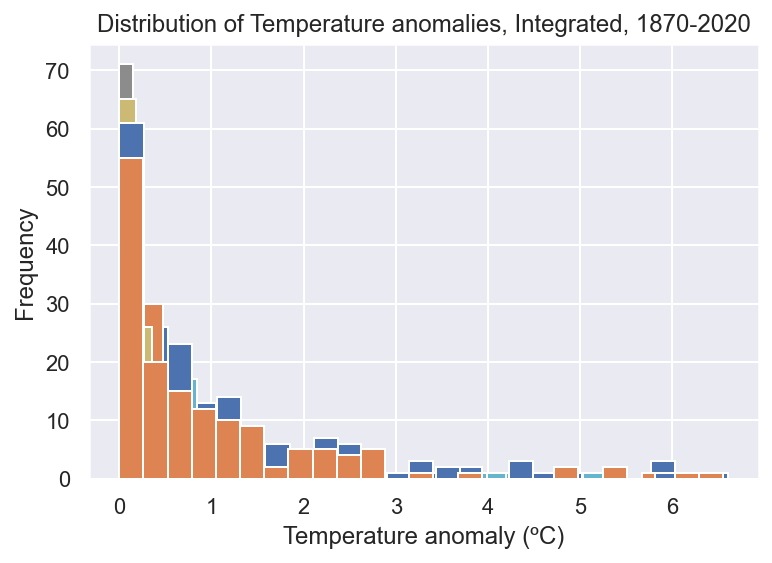

In [7]:
# Histograms using Pandas plotting functionality
ax = data.January.plot.hist(bins=25)
ax2 = data.February.plot.hist(bins=25)
ax3 = data.March.plot.hist(bins=25)
ax4 = data.April.plot.hist(bins=25)
ax5 = data.May.plot.hist(bins=25)
ax6 = data.June.plot.hist(bins=25)
ax7 = data.July.plot.hist(bins=25)
ax8 = data.August.plot.hist(bins=25)
ax9 = data.September.plot.hist(bins=25)
ax10 = data.October.plot.hist(bins=25)
ax11 = data.November.plot.hist(bins=25)
ax12 = data.December.plot.hist(bins=25)
ax.set(xlabel='Temperature anomaly (ºC)', 
       ylabel='Frequency',
       title='Distribution of Temperature anomalies, Integrated, 1870-2020');

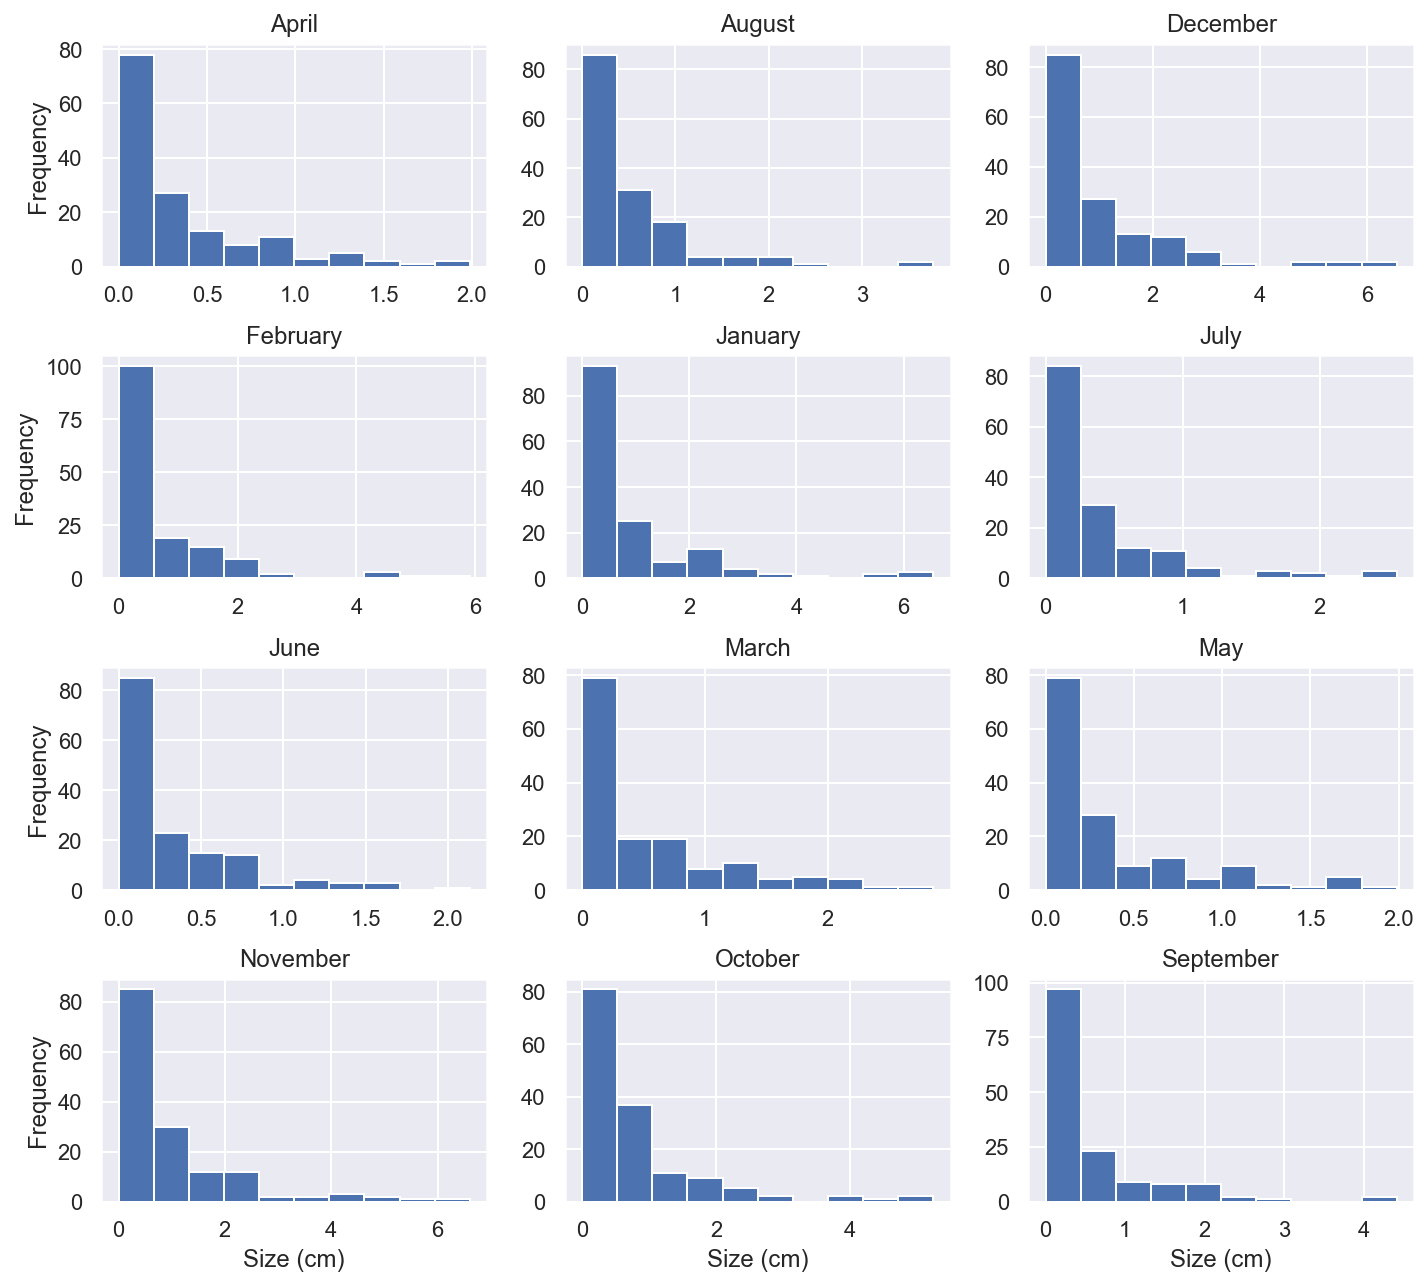

In [8]:
# To use all the columns, excepting "Year"
data = data.loc[:, data.columns != 'Year']
# To create four separate plots, I used Pandas `.hist` method
axList = data.hist(figsize=(10,9))

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
        
# In order to prevent plot titles from overlappig, I simply call
plt.tight_layout()
plt.show()

## 03.3. Actions taken for feature engineering

I will set out to improve on a baseline set of features via feature engineering: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

I will use visual exploration, domain understanding, and intuition to construct new features to improve the forecasting capabilities of some new foreseen model.

> 1. One-hot Encoding variables
> 2. Log transformation for skewed variables
> 3. Pair plot for features


#### 03.3.1. One-hot Encoding variables

I'm going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

In [9]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
January,150.0,0.936987,1.312199,0.001,0.15600,0.4165,1.04575,6.554
February,150.0,0.707720,1.005615,0.000,0.06800,0.3305,0.94575,5.905
March,150.0,0.518067,0.621134,0.000,0.05800,0.2650,0.72300,2.856
April,150.0,0.350060,0.415718,0.000,0.05425,0.1720,0.50750,1.988
May,150.0,0.354113,0.442688,0.000,0.03300,0.1805,0.50050,1.988
June,150.0,0.323100,0.406654,0.000,0.02975,0.1560,0.44900,2.132
July,150.0,0.387827,0.523922,0.000,0.04000,0.1850,0.47600,2.560
August,150.0,0.465927,0.640622,0.000,0.03700,0.1640,0.65600,3.764
September,150.0,0.547320,0.757895,0.000,0.05800,0.2650,0.68475,4.410
October,150.0,0.734567,0.971039,0.000,0.08550,0.4490,0.86500,5.244


#### 4.2. Log transforming skew variables


In [10]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [11]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
February,2.670522
August,2.448311
January,2.422370
September,2.378818
October,2.353895
December,2.252746
July,2.184329
November,2.144505
June,1.827604
May,1.697871


Skewed columns are columns in which the data is not evenly distributed among the rows. According to this, there is no skewed data in this dataset.

#### 4.3. Pair plot of features

Let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

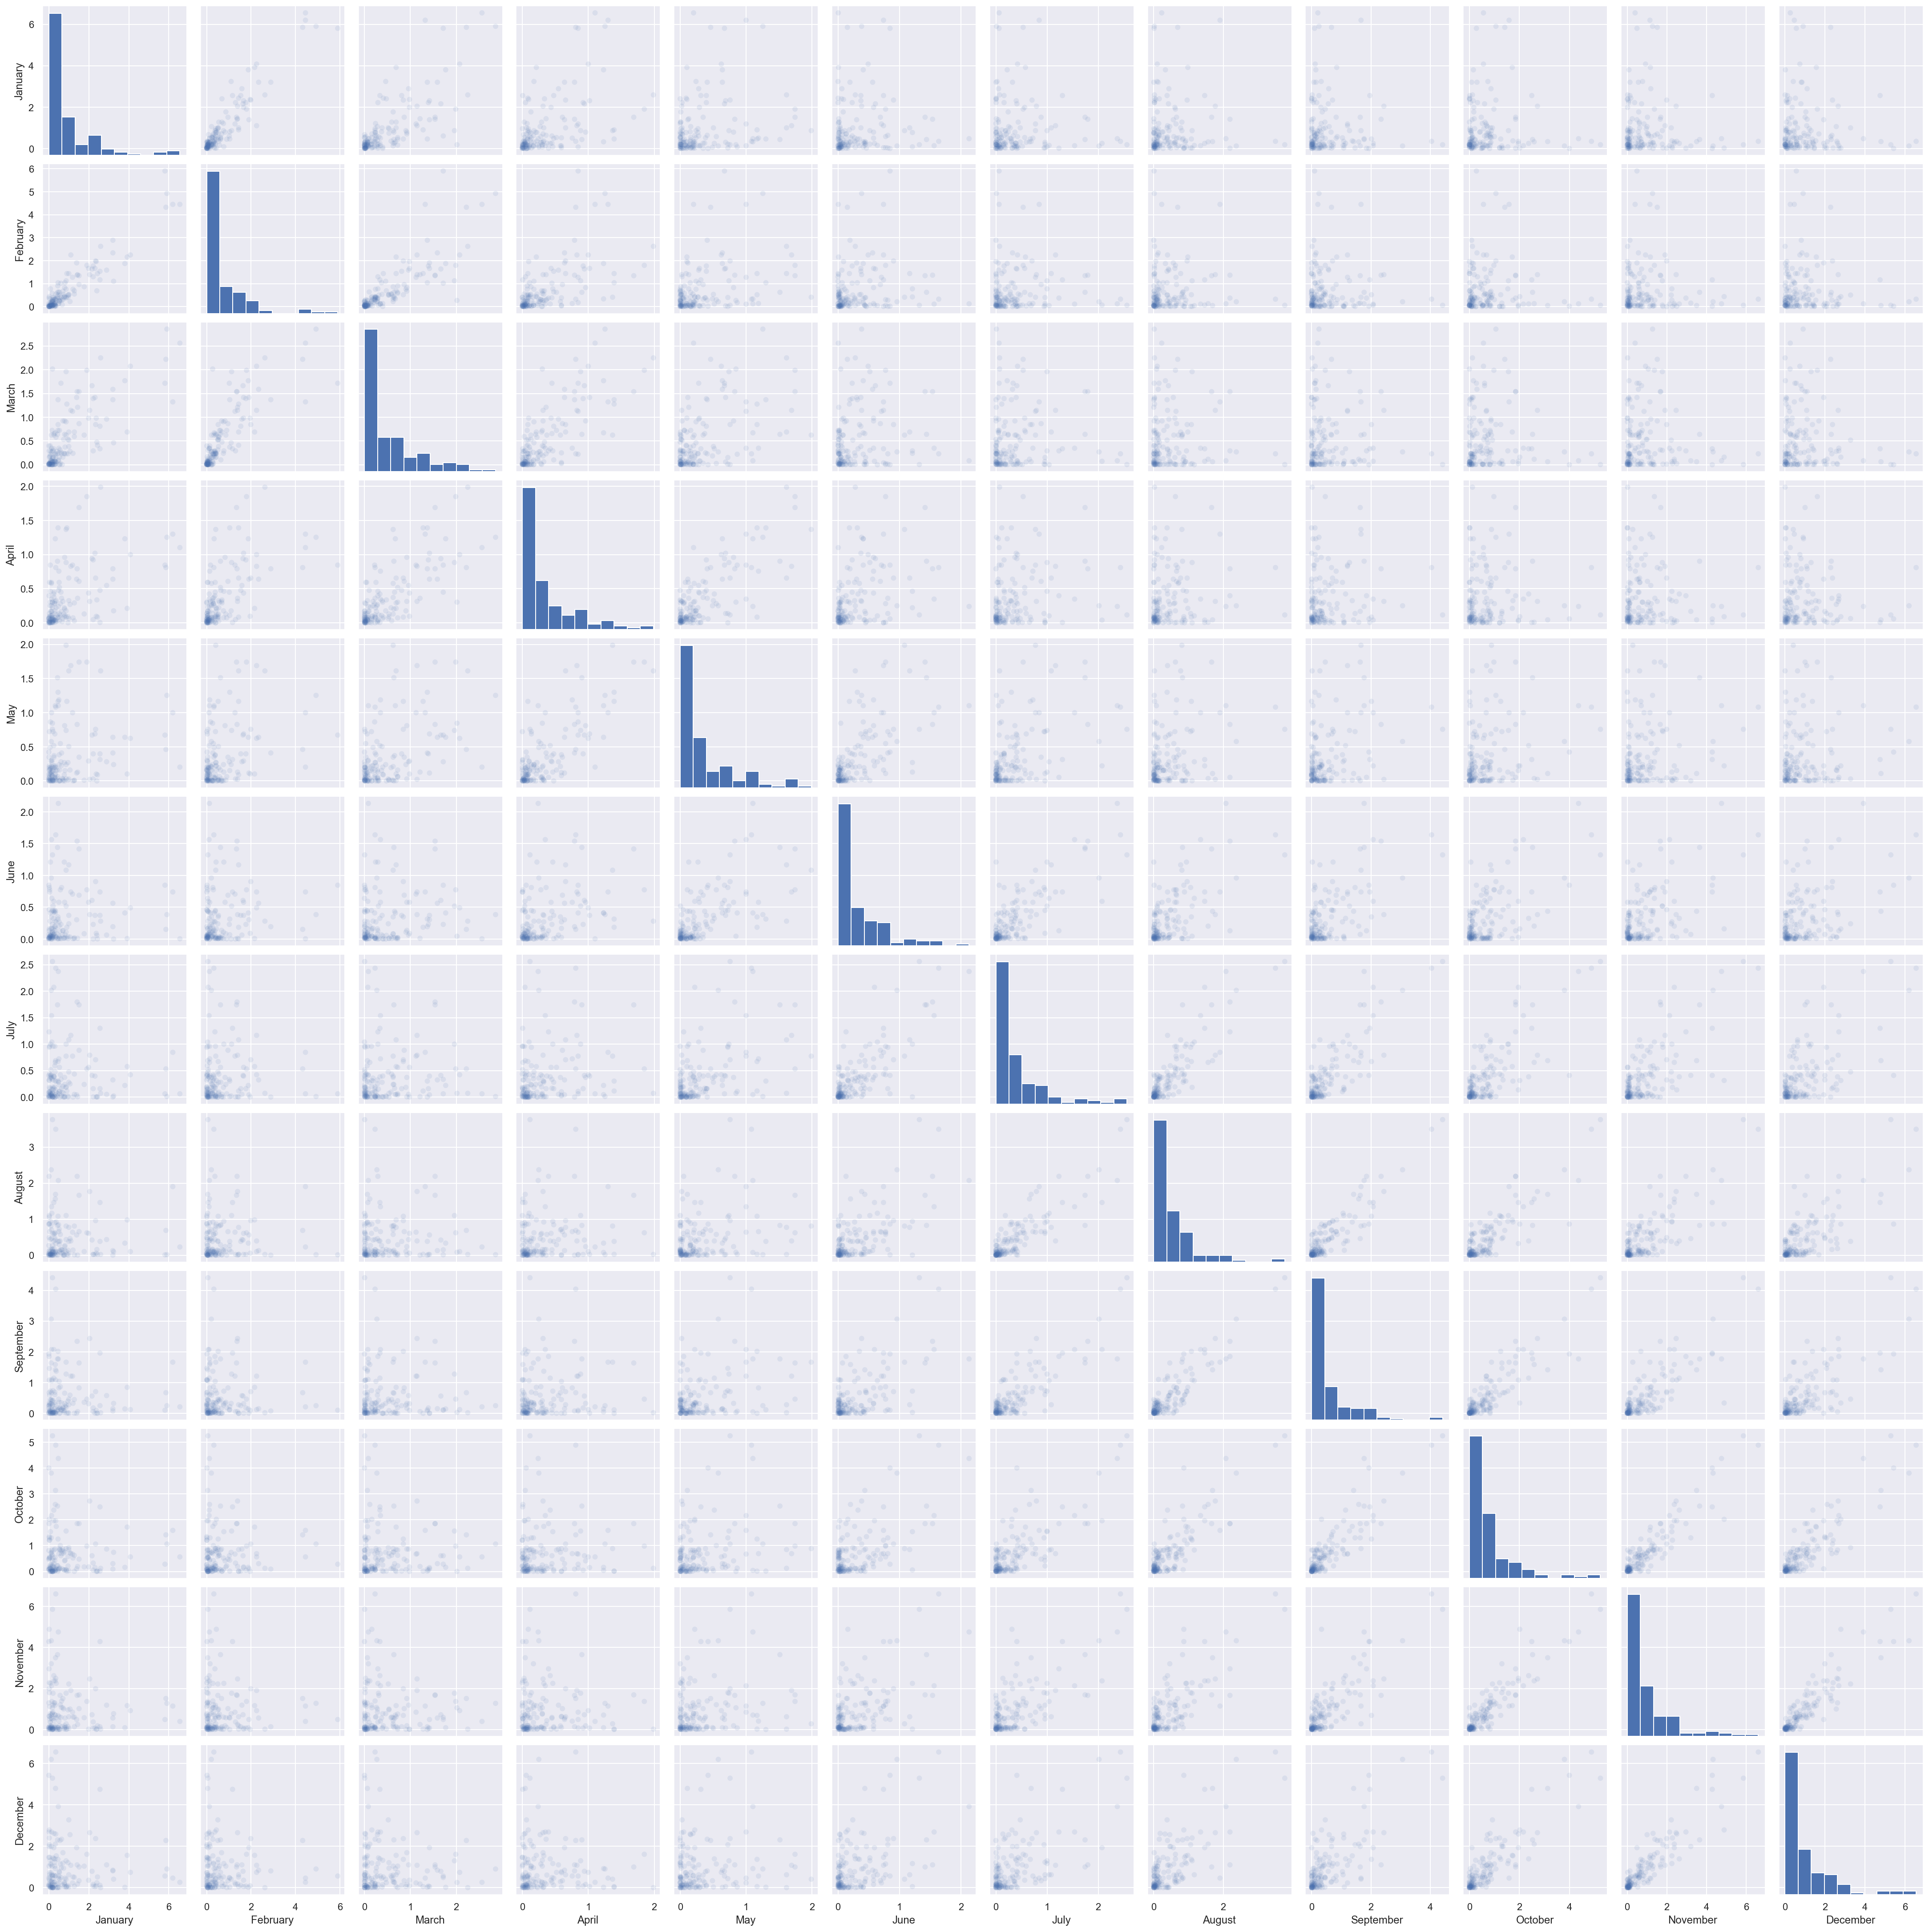

In [12]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

Because the data series does not contain different temperature categories, but presents the average ranges of the temperature anomalies, it is not possible to execute the following analyses, since they depend on the existence of different categories in the data series:

> A. Basic feature engineering: adding polynomial and interaction terms
> B. Feature engineering: categories and features derived from category aggregates

**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?  

The distribution of each data set follows an almost normal distribution, with some exceptions as is to be expected in a data set expressing an anomaly, in this case, of ocean temperatures.

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

By looking at the scatterplots of the data series, it is possible to interpret that it is not possible to perform linear regressions, either by the method of least squares or by any other way that allows the interpretation of the behaviour of the data in the form of linear, polynomial or other equations. The dispersion of the data is such that other, more complex statistical analyses would be required.

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

Each data set is not different in nature from the others, as they all reflect the behaviours of a natural variable. Despite the possible sources of error in the measurement of these data, it is not possible to say that these data are influenced by each other. The environmental conditions vary according to the time of year, but this is an external variable.

## 04. Linear regression models application

### 04.1. Introduction

Before to apply the linear regression models, we do some checks over the quality of the data set:

* Apply transformations to make target variable more normally distributed for regression
* Apply inverse transformations to be able to use these in a regression context

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed, such as Log, Square root and Box cox, just in the case our data would not have a normal distribution.

### 04.2. Simple Linear Regression Model

#### 04.2.1 Determining Normality

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test

##### 04.2.1.1 Visually

Plotting a histogram:

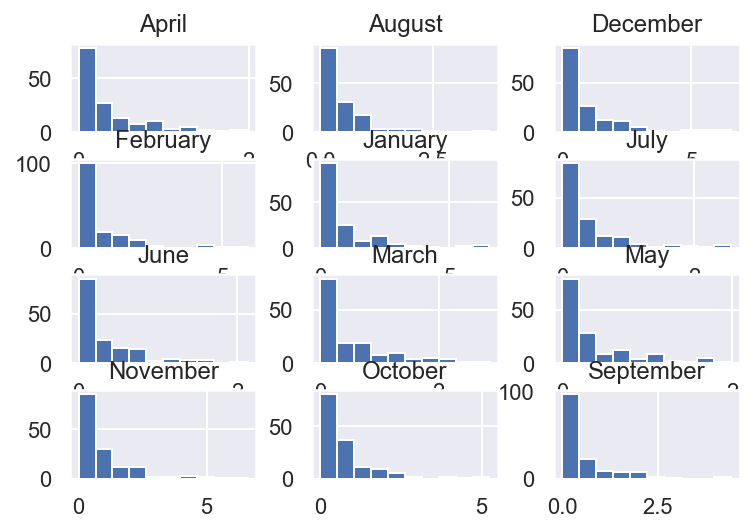

In [13]:
data.hist();

Does not look %100 with a normal distribution due to left tail in some of the months, like October. Let's try to verify statistically through a Normal Test:

##### 04.2.1.2 Using a statistical test

In [14]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [15]:
normaltest(data.values)

NormaltestResult(statistic=masked_array(data=[90.71161854330484, 104.18332939316753,
                   45.17113151737711, 52.93628379148347,
                   53.32719135094744, 62.77490697632429,
                   79.54031628018983, 95.80570747017717, 92.1007438975233,
                   89.38086460474592, 79.30716961329398,
                   84.57981161473315],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value=1e+20), pvalue=array([2.00549836e-20, 2.38164742e-23, 1.55315007e-10, 3.19913103e-12,
       2.63116165e-12, 2.33669564e-14, 5.34613320e-18, 1.57056153e-21,
       1.00133080e-20, 3.90114288e-20, 6.00712862e-18, 4.30256329e-19]))

p-value _extremely_ low, then, our Temperature variables we've been dealing with were not normally distributed. We will execute the box cox transformation.

#### 04.2.3. Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible". So, we will apply this transformation over our dataset.

In [16]:
from scipy.stats import boxcox
bc_result = boxcox(data.January)
boxcox_January = bc_result[0]
lam = bc_result[1]
normaltest(boxcox_January)

NormaltestResult(statistic=0.16439440275013362, pvalue=0.9210903005114939)

#### 04.2.4. Testing this basic regression:

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [18]:
lr = LinearRegression()

##### 04.2.4.1. Create X and Y

In [19]:
y_col = 'January'

X = data.drop(y_col, axis=1)
y = data[y_col]

##### 04.2.4.2. Create Polynomial Features

In [20]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

##### 04.2.4.3. Train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

##### 04.2.4.4. Fit `StandardScaler` on `X_train` as before

In [22]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

##### 04.2.4.5. Applying the appropriate transformation

In [23]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [24]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

#### 04.2.5. Determine the R^2 of this Basic Linear Regression

In [25]:
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.23865893073401856

The low R-squared value shows that even our noisy, high-variability data can have a significant trend. The trend indicates that the predictor variable still provides information about the response even though data points fall further from the regression line.

### 04.3. Ridge and Lasso Regression models

Because Basic Linear Regression does not adequately represent the dispersion of data, we will try two other approaches. We will restart the module:

In [26]:
import sys
sys.modules[__name__].__dict__.clear()

And then, import the data and Python modules:

In [27]:
import pandas as pd
import numpy as np
filepath = "data/data_.csv"
data = pd.read_csv(filepath)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

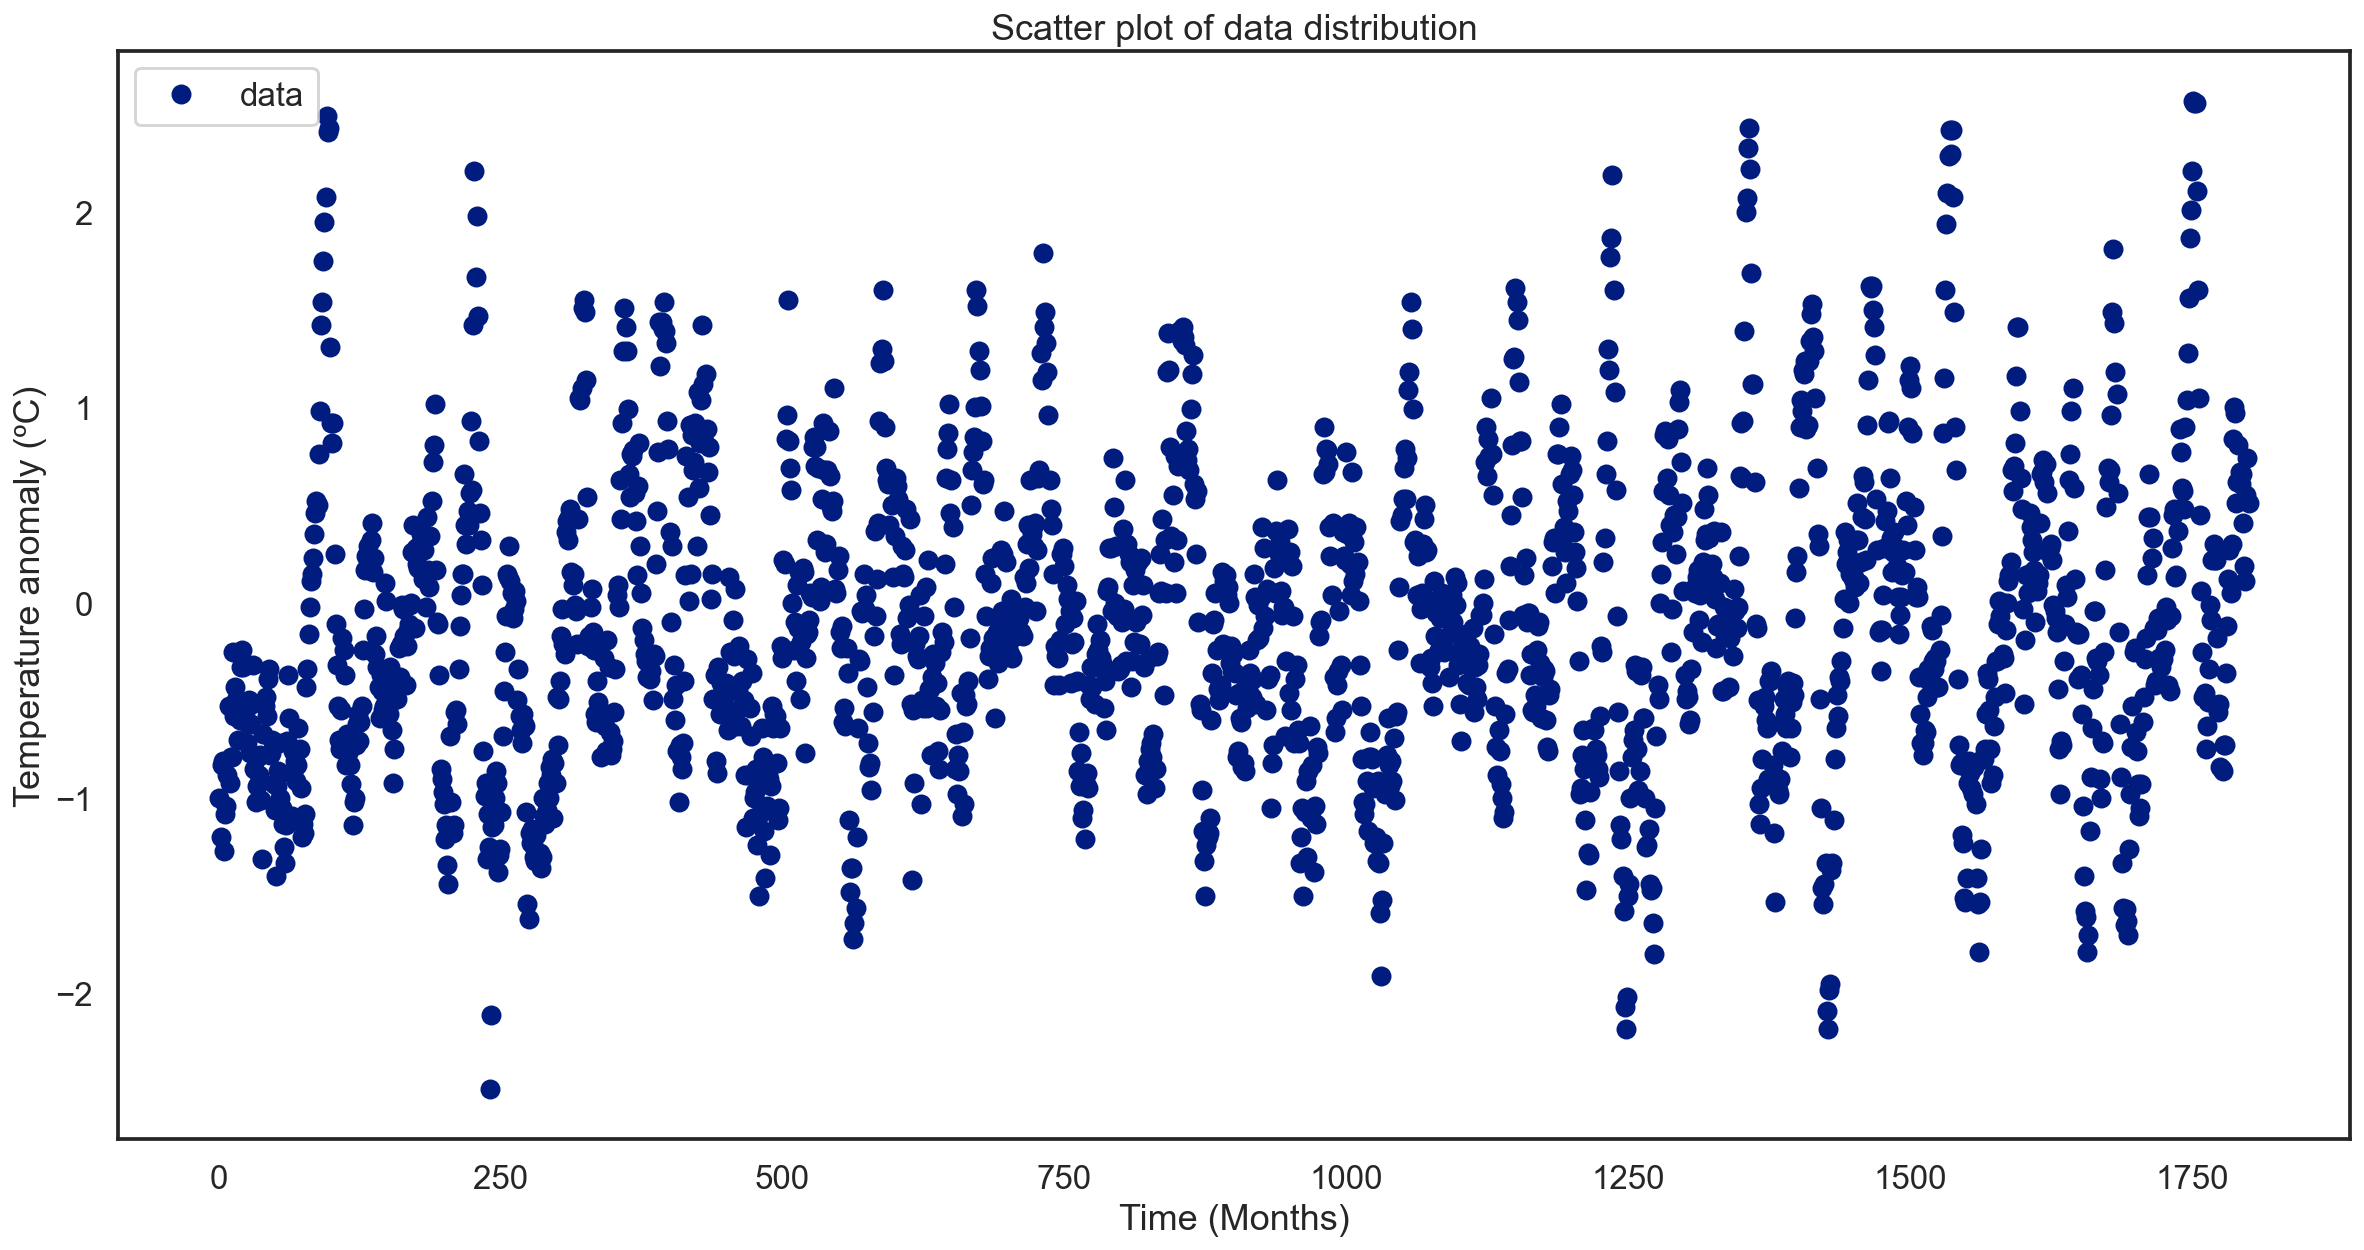

In [29]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
fig, ax = plt.subplots(figsize=(20, 10))
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.legend()
ax.set(xlabel='Time (Months)', ylabel='Temperature anomaly (ºC)',
       title='Scatter plot of data distribution');


Now, we will perform the regression on using the data with polynomial features using ridge regression ( 𝛼 =0.001) and lasso regression ( 𝛼 =0.0001), and plot the results.
We also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous chapter. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

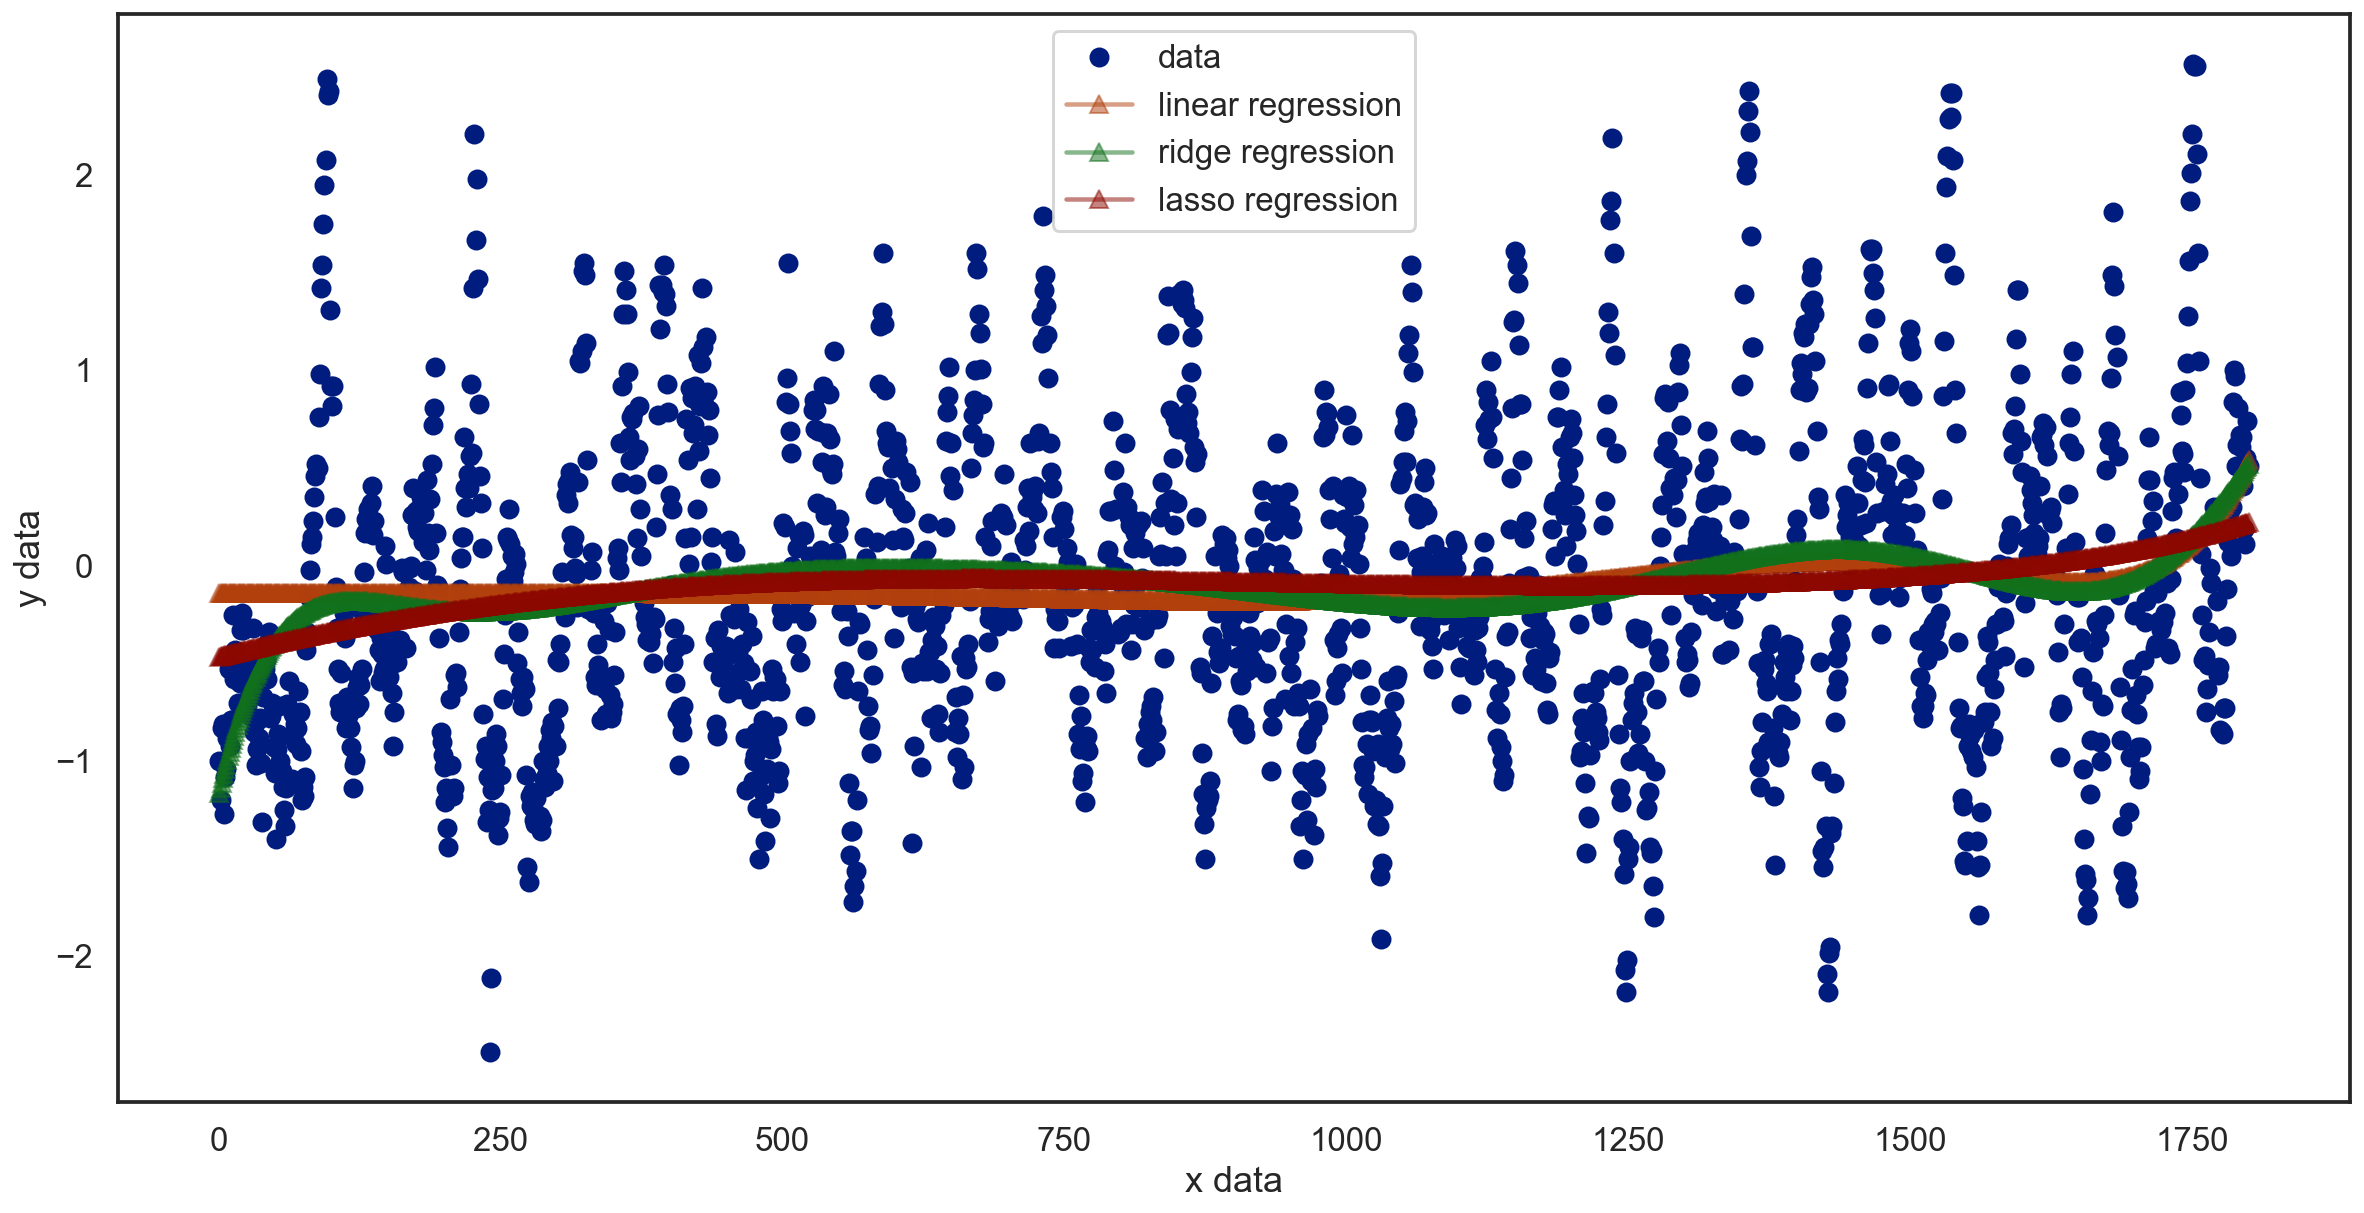

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 10
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = data[['x']]
Y_data = data['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.figure(figsize=(20,10))
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

Let's look at the absolute value of coefficients for each model!

In [31]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)
pd.options.display.max_columns = coefficients.shape[1]
print(coefficients)

    linear regression  ridge regression  lasso regression
0        0.000000e+00      0.000000e+00      0.000000e+00
1        7.135433e-26      2.607711e-02      1.450916e-03
2        2.995093e-30      2.587105e-04      1.590170e-06
3        1.774428e-32      1.288697e-06      3.687516e-10
4        1.486096e-29      3.680417e-09      1.581282e-13
5        1.045231e-26      6.507573e-12      1.785516e-17
6        5.921091e-24      7.366434e-15      1.561352e-20
7        2.116166e-21      5.337347e-18      1.262764e-23
8        4.461023e-24      2.388322e-21      4.659747e-27
9        3.069253e-27      5.996891e-25      3.576237e-31
10       6.930414e-31      6.449649e-29      2.319196e-33


# 05. Linear regression model selection to apply to the data set

As can be seen in the previous tables, none of the approximations made through linear regression can represent the trends that the data analysed have, and a considerable dispersion can be observed on the results of the regressions. Nevertheless, since it is necessary to estimate which of all the regression models is the best fit to the data set, it is observed that the Ridge Method is the one that obtains the best fit, as it is possible to define from the results of the previous table.

# 06. Summary Key Findings and Insights

The data analysed has a too complicated dispersion to be analysed under the terms proposed by linear regression. The data did not present a normal distribution, which makes sense according to the denomination of anomalies in water temperatures at sea level that the data set characterises. Despite the "cleaning" processes, and the fact that there is no skewed data in this dataset, the nature of the data such as its extreme dispersion and the variability associated with this process make the analysis very limited through the application of these tools.

# 07. Suggestions for next steps

The enormous progress over the last decades in our understanding of the mechanisms behind the complex system “Earth” is in no small extent based on the availability of enlarged data sets and sophisticated methods for their analysis. Univariate as well as multivariate time series are a particular class of such data which are of special importance for studying the dynamical processes in complex systems. Time series analysis theory and applications in geo- and astrophysics have always been mutually stimulating, starting with classical (linear) problems like the proper estimation of power spectra. In the second half of the 20th century, more and more evidence has been accumulated that most processes in nature are intrinsically non-linear and thus cannot be sufficiently studied by linear statistical methods.